# Question 1: When is it most profitable to release movies?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# set table to variable
df = pd.read_csv('joined_gross_budget_cleaned.csv')

In [3]:
df.head() #checking the layout

,title,month,year,production_budget,domestic_gross,worldwide_gross,net_prof,net_margin_%
0,(500) Days of Summer,7.0,2009,7500000.0,32425665.0,34439060.0,26939060.0,78.22
1,10 Cloverfield Lane,3.0,2016,5000000.0,72082999.0,108286422.0,103286422.0,95.38
2,10 Things I Hate About You,3.0,1999,13000000.0,38177966.0,60413950.0,47413950.0,78.48
3,"10,000 B.C.",3.0,2008,105000000.0,94784201.0,269065678.0,164065678.0,60.98
4,12 Monkeys,12.0,1995,29000000.0,57141459.0,168841459.0,139841459.0,82.82


In [4]:
# checking for datatypes in table


In [5]:
# Change month from float to int
df['month'] = df['month'].astype(int)
df['month'].dtype

dtype('float64')

dtype('int32')

dtype('float64')

In [8]:
# Change order to month
df = df.sort_values(by='month')
df.head()

,title,month,year,production_budget,domestic_gross,worldwide_gross,net_prof,net_margin_%
950,Fish Tank,1,2010,3000000.0,374675.0,5922292.0,2922292.0,49.34
310,Battle for the Planet of the Apes,1,1973,1800000.0,8800000.0,8800000.0,7000000.0,79.55
2731,The Boy Next Door,1,2015,4000000.0,36006065.0,53401938.0,49401938.0,92.51
2733,The Boys from Brazil,1,1978,12000000.0,19000000.0,19000000.0,7000000.0,36.84
2743,The Butterfly Effect,1,2004,13000000.0,57924679.0,95638592.0,82638592.0,86.41


In [9]:
# separating the relevent values
df = df[['month', 'net_prof']]
df.head()

,month,net_prof
950,1,2922292.0
310,1,7000000.0
2731,1,49401938.0
2733,1,7000000.0
2743,1,82638592.0


In [10]:
#checking the max net profit to adjust the range of the y axis


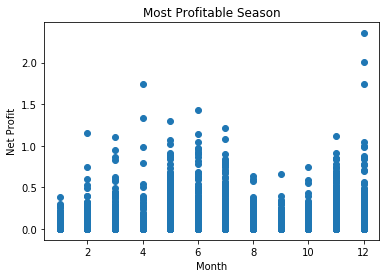

In [17]:
# plotting graph
plt.scatter(df['month'], df['net_prof'].map(lambda x: x/1000000000), label=
            'Profits')
#adding labels
plt.xlabel('Month'), plt.ylabel('Net Profit')
plt.title('Most Profitable Season')

plt.show()